In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#############################
# BOGUS values
#############################

BOGUS_INT = -999

In [3]:
#############################
# Define file
#############################

file = 'networkscores_0TEST'
outputFile = '/Users/isobel/Desktop/DUNE/2024/Hierarchy/files/' + file + '.npz'

In [4]:
#############################
# Read file
#############################

print('Reading file: ', str(outputFile),', This may take a while...')

data = np.load(outputFile)

run_in = data['run']
subrun_in = data['subrun']
event_in = data['event']
particleMask_in = data['particleMask']
pfpTruePDG_in = data['pfpTruePDG']
trueTrackID_in = data['trueTrackID']
trueVisibleGeneration_in = data['trueVisibleGeneration']
trueVisibleParentPFPIndex_in = data['trueVisibleParentPFPIndex']
nSpacepoints_in = data['nSpacepoints']
primaryLinkMask_in = data['primaryLinkMask']
primaryPFPIndex_in = data['primaryPFPIndex']
isTruePrimaryLink_in = data['isTruePrimaryLink']
primaryTotNetworkPred_in = data['primaryTotNetworkPred']
primaryIsTrack_in = data['primaryIsTrack']
higherLinkMask_in = data['higherLinkMask']
parentPFPIndex_in = data['parentPFPIndex']
childPFPIndex_in = data['childPFPIndex']
isTrueParentChildLink_in = data['isTrueParentChildLink']
higherTotNetworkPred_in = data['higherTotNetworkPred']
higherIsTrack_in = data['higherIsTrack']

# For pandora comparison
pandoraParentSelf_in = data['pandoraParentSelf']
pandoraGeneration_in = data['pandoraGeneration']
trueVisibleParentSelf_in = data['trueVisibleParentSelf']

Reading file:  /Users/isobel/Desktop/DUNE/2024/Hierarchy/files/networkscores_0TEST.npz , This may take a while...


In [5]:
nEntries = len(particleMask_in)

#nEntries = 1

print('nEntries:', nEntries)

nEntries: 1000


In [6]:
############################
# Tune primaries
############################

primary_thresholds = []
primary_efficiency = []
primary_purity = []
primary_metric = []

primaries_as_primaries_frac = []
primaries_as_other_frac = []
other_as_primaries_frac = []
other_as_other_frac = []


############################
# Loop through thresholds
############################
for primary_threshold in range(0,20) :
    
    primary_threshold /= float(20)
    print('---------------------------------------------')
    print('primary_threshold:', primary_threshold)
    print('')
    
    primary_thresholds.append(primary_threshold)
    
    n_true_primaries = 0
    n_primaries_as_primaries = 0
    n_primaries_as_other = 0
    n_primaries_as_nothing = 0

    n_true_other = 0
    n_other_as_primaries = 0
    n_other_as_other = 0
    n_other_as_nothing = 0
    
    ############################
    # Loop through events
    ############################
    for iEvent in range(nEntries) :

        particle_mask = np.array(particleMask_in[iEvent])
        primary_link_mask = np.array(primaryLinkMask_in[iEvent])
        
        nSpacepoints = np.array(nSpacepoints_in[iEvent], dtype='int')[particle_mask]
        trueVisibleGeneration = np.array(trueVisibleGeneration_in[iEvent], dtype='int')[particle_mask]
        primaryPFPIndex = np.array(primaryPFPIndex_in[iEvent], dtype='int')[primary_link_mask]
        primaryScores = np.array(primaryTotNetworkPred_in[iEvent])[primary_link_mask]
        

#         print(trueVisibleGeneration)
#         print(primaryPFPIndex)
#         print(primaryScores)
        
        nParticles = np.count_nonzero(particle_mask)        
        
        for iParticle in range(nParticles) :
            
            if (nSpacepoints[iParticle] == 0) :
                continue
            
            primaryNetworkArrayIndex = np.where(primaryPFPIndex == iParticle)
            
#             print('iParticle:', iParticle)
#             print('primaryNetworkArrayIndex:', primaryNetworkArrayIndex)

            if (trueVisibleGeneration[iParticle] == 2) :
                n_true_primaries += 1
                
                if (len(primaryNetworkArrayIndex[0]) == 0) :
                    n_primaries_as_nothing += 1
                    continue
                
                if (primaryScores[primaryNetworkArrayIndex[0][0]] > primary_threshold) :
                    n_primaries_as_primaries += 1
                else :
                    n_primaries_as_other += 1
            else :
                n_true_other += 1

                if (len(primaryNetworkArrayIndex[0]) == 0) :
                    n_other_as_nothing += 1
                    continue
                
                if (primaryScores[primaryNetworkArrayIndex[0][0]] > primary_threshold) :
                    n_other_as_primaries += 1
                else :
                    n_other_as_other += 1
                    
    print('n_true_primaries:', n_true_primaries)
    print('n_primaries_as_primaries:', n_primaries_as_primaries)
    print('n_primaries_as_other:', n_primaries_as_other)
    print('n_primaries_as_nothing:', n_primaries_as_nothing)

    print('n_true_other:', n_true_other)
    print('n_other_as_primaries:', n_other_as_primaries)
    print('n_other_as_other:', n_other_as_other)
    print('n_other_as_nothing:', n_other_as_nothing)
                    
                    
    ############################
    # Work out metrics
    ############################
    selected_primaries = n_primaries_as_primaries + n_other_as_primaries
    primary_efficiency.append(0 if n_true_primaries == 0 else float(n_primaries_as_primaries)/float(n_true_primaries))
    primary_purity.append(0 if selected_primaries == 0 else float(n_primaries_as_primaries)/float(selected_primaries))
    primary_metric.append(primary_efficiency[-1] * primary_purity[-1])
    
    primaries_as_primaries_frac.append(0 if n_true_primaries == 0 else float(n_primaries_as_primaries) / float(n_true_primaries))
    primaries_as_other_frac.append(0 if n_true_primaries == 0 else float(n_primaries_as_other) / float(n_true_primaries))
    other_as_primaries_frac.append(0 if n_true_other == 0 else float(n_other_as_primaries) / float(n_true_other))
    other_as_other_frac.append(0 if n_true_other == 0 else float(n_other_as_other) / float(n_true_other))
    
print('---------------------------------------------')


---------------------------------------------
primary_threshold: 0.0

n_true_primaries: 3373
n_primaries_as_primaries: 3373
n_primaries_as_other: 0
n_primaries_as_nothing: 0
n_true_other: 1327
n_other_as_primaries: 1327
n_other_as_other: 0
n_other_as_nothing: 0
---------------------------------------------
primary_threshold: 0.05

n_true_primaries: 3373
n_primaries_as_primaries: 3361
n_primaries_as_other: 12
n_primaries_as_nothing: 0
n_true_other: 1327
n_other_as_primaries: 1086
n_other_as_other: 241
n_other_as_nothing: 0
---------------------------------------------
primary_threshold: 0.1

n_true_primaries: 3373
n_primaries_as_primaries: 3317
n_primaries_as_other: 56
n_primaries_as_nothing: 0
n_true_other: 1327
n_other_as_primaries: 773
n_other_as_other: 554
n_other_as_nothing: 0
---------------------------------------------
primary_threshold: 0.15

n_true_primaries: 3373
n_primaries_as_primaries: 3297
n_primaries_as_other: 76
n_primaries_as_nothing: 0
n_true_other: 1327
n_other_as_pr

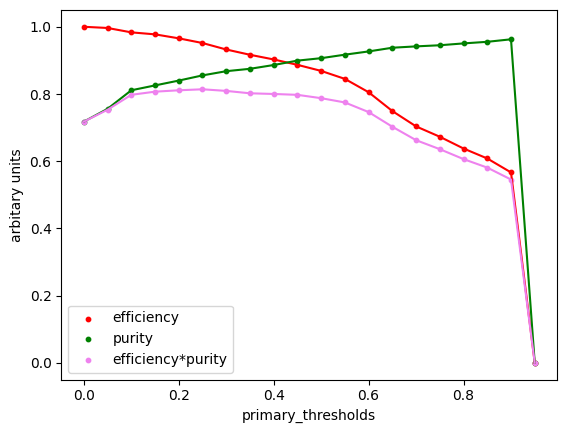

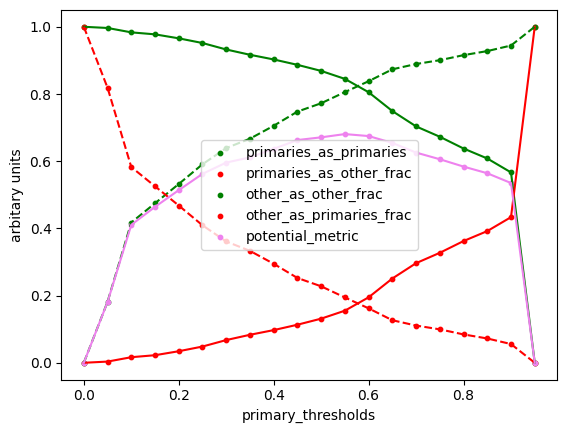

In [7]:
potential_metric = np.array(primaries_as_primaries_frac) * np.array(other_as_other_frac)



############################
# Primary plot!
############################

plt.clf()
plt.scatter(primary_thresholds, primary_efficiency, color='red', label='efficiency', s=10)
plt.plot(primary_thresholds, primary_efficiency, color='red')
plt.scatter(primary_thresholds, primary_purity, color='green', label='purity', s=10)
plt.plot(primary_thresholds, primary_purity, color='green')
plt.scatter(primary_thresholds, primary_metric, color='violet', label='efficiency*purity', s=10)
plt.plot(primary_thresholds, primary_metric, color='violet')
    
plt.xlabel('primary_thresholds')
plt.ylabel('arbitary units')
plt.legend()
plt.show()

############################

plt.clf()
plt.scatter(primary_thresholds, primaries_as_primaries_frac, color='green', label='primaries_as_primaries', s=10)
plt.plot(primary_thresholds, primaries_as_primaries_frac, color='green')
plt.scatter(primary_thresholds, primaries_as_other_frac, color='red', label='primaries_as_other_frac', s=10)
plt.plot(primary_thresholds, primaries_as_other_frac, color='red')
plt.scatter(primary_thresholds, other_as_other_frac, color='green', label='other_as_other_frac', s=10)
plt.plot(primary_thresholds, other_as_other_frac, color='green', linestyle='dashed')
plt.scatter(primary_thresholds, other_as_primaries_frac, color='red', label='other_as_primaries_frac', s=10)
plt.plot(primary_thresholds, other_as_primaries_frac, color='red', linestyle='dashed')


plt.scatter(primary_thresholds, potential_metric, color='violet', label='potential_metric', s=10)
plt.plot(primary_thresholds, potential_metric, color='violet')


plt.xlabel('primary_thresholds')
plt.ylabel('arbitary units')
plt.legend()
plt.show()

In [8]:
#######################################
# Define optimal primary threshold
#######################################

PRIMARY_THRESHOLD = 0.55

In [9]:
##################################################
# Build the primary tier with optimised threshold!
##################################################

new_gen = []
new_parentPFPIndex = []

primaries = []


for iEvent in range(nEntries) :

    particle_mask = np.array(particleMask_in[iEvent])
    primary_link_mask = np.array(primaryLinkMask_in[iEvent])
    
    nSpacepoints = np.array(nSpacepoints_in[iEvent], dtype='int')[particle_mask]
    primaryPFPIndex = np.array(primaryPFPIndex_in[iEvent], dtype='int')[primary_link_mask]
    primaryScores = np.array(primaryTotNetworkPred_in[iEvent])[primary_link_mask]
    nParticles = np.count_nonzero(particle_mask)
    
    this_parentPFPIndex = [BOGUS_INT] * nParticles
    this_gen = [BOGUS_INT] * nParticles
    
    this_primaries = []
    
    for iParticle in range(nParticles) :
        
        if (nSpacepoints[iParticle] == 0) : 
            continue
        
        primaryNetworkArrayIndex = np.where(primaryPFPIndex == iParticle)
        
        if (primaryNetworkArrayIndex[0].shape[0] == 0) :
            continue
        
        if (primaryScores[primaryNetworkArrayIndex[0][0]] > PRIMARY_THRESHOLD) :
            this_primaries.append(iParticle)
            this_gen[iParticle] = 2
            this_parentPFPIndex[iParticle] = -1
    
    new_gen.append(this_gen)
    new_parentPFPIndex.append(this_parentPFPIndex)
    primaries.append(this_primaries)

In [10]:
############################
# Metrics!
#############################
n_two_d = 0
n_true_primary = 0
n_true_secondary = 0
n_true_higher = 0

# NEW!
n_correct_parent_primary_new = 0
n_tagged_as_primary_primary_new = 0
n_incorrect_parent_primary_new = 0
n_not_tagged_primary_new = 0 

n_correct_parent_secondary_new = 0
n_tagged_as_primary_secondary_new = 0
n_incorrect_parent_secondary_new = 0
n_not_tagged_secondary_new = 0 

n_correct_parent_higher_new = 0
n_tagged_as_primary_higher_new = 0
n_incorrect_parent_higher_new = 0
n_not_tagged_higher_new = 0 

for iEvent in range(nEntries) : 
    
    # Particle mask
    particle_mask = np.array(particleMask_in[iEvent])
    #particle_mask = np.logical_and(np.array(particleMask_in[iEvent]), np.array(nSpacepoints_in[iEvent]) != 0)
    # PFP info
    nSpacepoints_np = np.array(nSpacepoints_in[iEvent])[particle_mask]
    # Truth
    trueVisibleGeneration_np = np.array(trueVisibleGeneration_in[iEvent])[particle_mask]
    trueVisibleParentPFPIndex_np = np.array(trueVisibleParentPFPIndex_in[iEvent])[particle_mask]
    # New
    newParentPFPIndex_np = np.array(new_parentPFPIndex[iEvent])
    newGen_np = np.array(new_gen[iEvent])
    
    #########################
    # Get tier masks
    #########################
    two_d_mask = (nSpacepoints_np == 0)
    true_primary_mask = np.logical_and(np.logical_not(two_d_mask), trueVisibleGeneration_np == 2)
    true_secondary_mask = np.logical_and(np.logical_not(two_d_mask), trueVisibleGeneration_np == 3)
    true_higher_mask = np.logical_and(np.logical_not(two_d_mask), np.logical_not(np.logical_or(true_primary_mask, true_secondary_mask)))

    #############################################
    # Get metrics for this event - debugging
    #############################################
    # Totals
    this_two_d = np.count_nonzero(two_d_mask)
    this_true_primary = np.count_nonzero(true_primary_mask)
    this_true_secondary = np.count_nonzero(true_secondary_mask)
    this_true_higher = np.count_nonzero(true_higher_mask)
    
    # New
    this_correct_parent_primary_new = np.count_nonzero(newGen_np[true_primary_mask] == 2)
    this_tagged_as_primary_primary_new = 0
    this_not_tagged_primary_new = np.count_nonzero(newGen_np[true_primary_mask] == BOGUS_INT)
    this_incorrect_parent_primary_new = np.count_nonzero(np.logical_and(newGen_np[true_primary_mask] != 2, \
                                                                        newGen_np[true_primary_mask] != BOGUS_INT)) 
    
    this_correct_parent_secondary_new = np.count_nonzero(newParentPFPIndex_np[true_secondary_mask] == trueVisibleParentPFPIndex_np[true_secondary_mask])
    this_tagged_as_primary_secondary_new = np.count_nonzero(newGen_np[true_secondary_mask] == 2)
    this_not_tagged_secondary_new = np.count_nonzero(newGen_np[true_secondary_mask] == BOGUS_INT)
    this_incorrect_parent_secondary_new = np.count_nonzero(np.logical_not(np.logical_or(newParentPFPIndex_np[true_secondary_mask] == trueVisibleParentPFPIndex_np[true_secondary_mask], \
                                                                                        np.logical_or(newGen_np[true_secondary_mask] == 2, \
                                                                                                      newGen_np[true_secondary_mask] == BOGUS_INT))))
    
    this_correct_parent_higher_new = np.count_nonzero(newParentPFPIndex_np[true_higher_mask] == trueVisibleParentPFPIndex_np[true_higher_mask])
    this_tagged_as_primary_higher_new = np.count_nonzero(newGen_np[true_higher_mask] == 2)
    this_not_tagged_higher_new = np.count_nonzero(newGen_np[true_higher_mask] == BOGUS_INT)
    this_incorrect_parent_higher_new = np.count_nonzero(np.logical_not(np.logical_or(newParentPFPIndex_np[true_higher_mask] == trueVisibleParentPFPIndex_np[true_higher_mask], \
                                                                                     np.logical_or(newGen_np[true_higher_mask] == 2, \
                                                                                                   newGen_np[true_higher_mask] == BOGUS_INT))))

    
    #############################################
    # Add metrics to global
    #############################################
    n_two_d += this_two_d
    n_true_primary += this_true_primary
    n_true_secondary += this_true_secondary
    n_true_higher += this_true_higher
    n_correct_parent_primary_new += this_correct_parent_primary_new
    n_tagged_as_primary_primary_new += this_tagged_as_primary_primary_new
    n_incorrect_parent_primary_new += this_incorrect_parent_primary_new
    n_not_tagged_primary_new += this_not_tagged_primary_new
    n_correct_parent_secondary_new += this_correct_parent_secondary_new
    n_tagged_as_primary_secondary_new += this_tagged_as_primary_secondary_new
    n_incorrect_parent_secondary_new += this_incorrect_parent_secondary_new
    n_not_tagged_secondary_new += this_not_tagged_secondary_new
    n_correct_parent_higher_new += this_correct_parent_higher_new
    n_tagged_as_primary_higher_new += this_tagged_as_primary_higher_new
    n_incorrect_parent_higher_new += this_incorrect_parent_higher_new
    n_not_tagged_higher_new += this_not_tagged_higher_new
    
    
    
#############################################
# Print metrics
#############################################   
    
n_correct_parent_primary_frac = round(float(n_correct_parent_primary_new) / float(n_true_primary), 2)
n_tagged_as_primary_primary_frac = round(float(n_tagged_as_primary_primary_new) / float(n_true_primary), 2)
n_incorrect_parent_primary_frac = round(float(n_incorrect_parent_primary_new) / float(n_true_primary), 2)
n_not_tagged_primary_frac = round(float(n_not_tagged_primary_new) / float(n_true_primary), 2)
    
    
n_correct_parent_secondary_frac = round(float(n_correct_parent_secondary_new) / float(n_true_secondary), 2)
n_tagged_as_primary_secondary_frac = round(float(n_tagged_as_primary_secondary_new) / float(n_true_secondary), 2)
n_incorrect_parent_secondary_frac = round(float(n_incorrect_parent_secondary_new) / float(n_true_secondary), 2)
n_not_tagged_secondary_frac = round(float(n_not_tagged_secondary_new) / float(n_true_secondary), 2)

n_correct_parent_higher_frac = round(float(n_correct_parent_higher_new) / float(n_true_higher), 2)
n_tagged_as_primary_higher_frac = round(float(n_tagged_as_primary_higher_new) / float(n_true_higher), 2)
n_incorrect_parent_higher_frac = round(float(n_incorrect_parent_higher_new) / float(n_true_higher), 2)
n_not_tagged_higher_frac = round(float(n_not_tagged_higher_new) / float(n_true_higher), 2)


print('------------------------------------------------')
print('')
print('-------------------------------------------------')
print('NEW - True Gen   | Primary | Secondary | Higher |')
print('-------------------------------------------------')
print('Correct parent   |' + str(n_correct_parent_primary_frac) + str(' '* (9 - len(str(n_correct_parent_primary_frac)))) + \
                       '|' + str(n_correct_parent_secondary_frac) + str(' '* (11 - len(str(n_correct_parent_secondary_frac)))) + \
                       '|' + str(n_correct_parent_higher_frac) + str(' '* (8 - len(str(n_correct_parent_higher_frac)))) + \
                       '|')
print('False primary    |' + str(n_tagged_as_primary_primary_frac) + str(' '* (9 - len(str(n_tagged_as_primary_primary_frac)))) + \
                       '|' + str(n_tagged_as_primary_secondary_frac) + str(' '* (11 - len(str(n_tagged_as_primary_secondary_frac)))) + \
                       '|' + str(n_tagged_as_primary_higher_frac) + str(' '* (8 - len(str(n_tagged_as_primary_higher_frac)))) + \
                       '|')
print('Incorrect parent |' + str(n_incorrect_parent_primary_frac) + str(' '* (9 - len(str(n_incorrect_parent_primary_frac)))) + \
                       '|' + str(n_incorrect_parent_secondary_frac) + str(' '* (11 - len(str(n_incorrect_parent_secondary_frac)))) + \
                       '|' + str(n_incorrect_parent_higher_frac) + str(' '* (8 - len(str(n_incorrect_parent_higher_frac)))) + \
                       '|')
print('Not tagged       |' + str(n_not_tagged_primary_frac) + str(' '* (9 - len(str(n_not_tagged_primary_frac)))) + \
                       '|' + str(n_not_tagged_secondary_frac) + str(' '* (11 - len(str(n_not_tagged_secondary_frac)))) + \
                       '|' + str(n_not_tagged_higher_frac) + str(' '* (8 - len(str(n_not_tagged_higher_frac)))) + \
                       '|')
print('-------------------------------------------------')
print('Total            |' + str(n_true_primary) + str(' '* (9 - len(str(n_true_primary)))) + \
                       '|' + str(n_true_secondary) + str(' '* (11 - len(str(n_true_secondary)))) + \
                       '|' + str(n_true_higher) + str(' '* (8 - len(str(n_true_higher)))) + \
                       '|')
print('-------------------------------------------------')

print('n_two_d (not included in metrics):', n_two_d)

------------------------------------------------

-------------------------------------------------
NEW - True Gen   | Primary | Secondary | Higher |
-------------------------------------------------
Correct parent   |0.84     |0.0        |0.0     |
False primary    |0.0      |0.21       |0.1     |
Incorrect parent |0.0      |0.0        |0.0     |
Not tagged       |0.16     |0.79       |0.9     |
-------------------------------------------------
Total            |3373     |1106       |221     |
-------------------------------------------------
n_two_d (not included in metrics): 221


In [11]:
#######################################
# Just checking!!
#######################################

index = 2

print('run:', run_in[index])
print('subrun:', subrun_in[index])
print('event:', event_in[index])

print('trueTrackID:', trueTrackID_in[index][particleMask_in[index]])
print('trueVisibleGeneration:', trueVisibleGeneration_in[index][particleMask_in[index]])
print('trueVisibleParentPFPIndex:', trueVisibleParentPFPIndex_in[index][particleMask_in[index]])
print('primaryPFPIndex:', primaryPFPIndex_in[index][primaryLinkMask_in[index]])
print('primaryIsTrack_in:', primaryIsTrack_in[index][primaryLinkMask_in[index]])      
print('primaryScores:', primaryTotNetworkPred_in[index][primaryLinkMask_in[index]])


print('new_gen:', new_gen[index])
print('new_parentPFPIndex:', new_parentPFPIndex[index])
print('primaries:', primaries[index])

run: 1109
subrun: 1
event: 7803
trueTrackID: [1 6 5 1]
trueVisibleGeneration: [2 2 2 3]
trueVisibleParentPFPIndex: [-1 -1 -1  0]
primaryPFPIndex: [0. 1. 2. 3.]
primaryIsTrack_in: [1. 0. 0. 0.]
primaryScores: [0.93880975 0.65774781 0.56239986 0.28030363]
new_gen: [2, 2, 2, -999]
new_parentPFPIndex: [-1, -1, -1, -999]
primaries: [0, 1, 2]


In [12]:
############################
# Tune higher tiers
############################

higher_thresholds = []

secondary_correct_parent_frac = []
secondary_no_parent_frac = []
secondary_incorrect_parent_frac = []

tertiary_correct_parent_frac = []
tertiary_no_parent_frac = []
tertiary_incorrect_parent_frac = []

higher_correct_parent_frac = []
higher_no_parent_frac = []
higher_incorrect_parent_frac = []

############################
# Loop through thresholds
############################
for higher_threshold in range(0, 11) :
    
    higher_threshold /= float(10)
    print('higher_threshold:', higher_threshold)
    
    higher_thresholds.append(higher_threshold)

    n_secondary = 0
    secondary_correct_parent = 0
    secondary_no_parent = 0
    secondary_incorrect_parent = 0

    n_tertiary = 0
    tertiary_correct_parent = 0
    tertiary_no_parent = 0
    tertiary_incorrect_parent = 0
    
    n_higher = 0
    higher_correct_parent = 0
    higher_no_parent = 0
    higher_incorrect_parent = 0

    ############################
    # Loop through events
    ############################
    
    for iEvent in range(nEntries) :

        this_particle_tiers = [[]]
        this_particle_tiers[0] = primaries[iEvent]

         # we have to make copies as we're going to want to fill these lists with the final result
        this_parentPFPIndex = new_parentPFPIndex[iEvent].copy()
        this_gen = new_gen[iEvent].copy()
        
        # Get data for the event
        particle_mask = np.array(particleMask_in[iEvent])
        higher_link_mask = np.array(higherLinkMask_in[iEvent])
        
        nSpacepoints = np.array(nSpacepoints_in[iEvent], dtype='int')[particle_mask]
        trueVisibleGeneration = np.array(trueVisibleGeneration_in[iEvent], dtype='int')[particle_mask]
        trueVisibleParentPFPIndex = np.array(trueVisibleParentPFPIndex_in[iEvent], dtype='int')[particle_mask]
        
        higherTierChildIndex = np.array(childPFPIndex_in[iEvent], dtype='int')[higher_link_mask]
        higherTierParentIndex = np.array(parentPFPIndex_in[iEvent], dtype='int')[higher_link_mask]
        higherTierScores = np.array(higherTotNetworkPred_in[iEvent])[higher_link_mask]

        ############################
        # Build hierarchy
        ############################    

        # Fill each tier at a time
        while (len(this_particle_tiers[-1]) != 0) :
            
            tier = []

            # Have to find the highest link out of all possible links - to ensure best links are made        
            found = True

            while (found) :
        
                iFoundParent = -1
                iFoundChild = -1
                highestLinkScore = -1
                found = False

                # Loop over particles in last built tier
                for iParent in this_particle_tiers[-1]:
                    
                    if (nSpacepoints[iParent] == 0) :
                        continue

                    networkLinks = np.where(higherTierParentIndex == iParent)[0]                     
                    
                    # Loop over its links
                    for iLink in networkLinks :

                        iChild = higherTierChildIndex[iLink]
                        
                        if (nSpacepoints[iChild] == 0) :
                            continue
                        
                        # If the child has already been assigned a parent
                        if (this_gen[iChild] != BOGUS_INT) :
                            continue

                        this_higherTierScore = higherTierScores[iLink]
                        
                        if ((this_higherTierScore > highestLinkScore) and (this_higherTierScore > higher_threshold)) :

                            highestLinkScore = this_higherTierScore
                            iFoundParent = iParent
                            iFoundChild = iChild
                            found = True
                            
                # If link found, add into this tier
                if (found) :
                    this_parentPFPIndex[iFoundChild] = iFoundParent
                    this_gen[iFoundChild] = len(this_particle_tiers) + 2
                    tier.append(iFoundChild)

            # Tier complete, add into hierarchy
            #print('tier:', tier)
            this_particle_tiers.append(tier)
    
        ############################
        # Add counts for event
        ############################    
        this_parentPFPIndex = np.array(this_parentPFPIndex)
        this_gen = np.array(this_gen)

        #########################
        # Get tier masks
        #########################
        two_d_mask = (nSpacepoints == 0)
        true_primary_mask = np.logical_and(np.logical_not(two_d_mask), trueVisibleGeneration == 2)
        true_secondary_mask = np.logical_and(np.logical_not(two_d_mask), trueVisibleGeneration == 3)
        true_tertiary_mask = np.logical_and(np.logical_not(two_d_mask), trueVisibleGeneration == 4)
        true_higher_mask = np.logical_and(np.logical_not(two_d_mask), np.logical_not(np.logical_or(true_primary_mask, np.logical_or(true_secondary_mask, true_tertiary_mask))))
        
        n_secondary += np.count_nonzero(true_secondary_mask)
        secondary_correct_parent += np.count_nonzero(trueVisibleParentPFPIndex[true_secondary_mask] == this_parentPFPIndex[true_secondary_mask])
        secondary_no_parent += np.count_nonzero(this_gen[true_secondary_mask] == BOGUS_INT)
        secondary_incorrect_parent += np.count_nonzero(np.logical_and(this_gen[true_secondary_mask] != BOGUS_INT, \
                                                                      trueVisibleParentPFPIndex[true_secondary_mask] != this_parentPFPIndex[true_secondary_mask]))

        n_tertiary += np.count_nonzero(true_tertiary_mask)
        tertiary_correct_parent += np.count_nonzero(trueVisibleParentPFPIndex[true_tertiary_mask] == this_parentPFPIndex[true_tertiary_mask])
        tertiary_no_parent += np.count_nonzero(this_gen[true_tertiary_mask] == BOGUS_INT)
        tertiary_incorrect_parent += np.count_nonzero(np.logical_and(this_gen[true_tertiary_mask] != BOGUS_INT, \
                                                                   trueVisibleParentPFPIndex[true_tertiary_mask] != this_parentPFPIndex[true_tertiary_mask]))
        
        
        
        n_higher += np.count_nonzero(true_higher_mask)
        higher_correct_parent += np.count_nonzero(trueVisibleParentPFPIndex[true_higher_mask] == this_parentPFPIndex[true_higher_mask])
        higher_no_parent += np.count_nonzero(this_gen[true_higher_mask] == BOGUS_INT)
        higher_incorrect_parent += np.count_nonzero(np.logical_and(this_gen[true_higher_mask] != BOGUS_INT, \
                                                                   trueVisibleParentPFPIndex[true_higher_mask] != this_parentPFPIndex[true_higher_mask]))
        
    ############################
    # Calculate metrics for threshold
    ############################      
    secondary_correct_parent_frac.append(0 if n_secondary == 0 else float(secondary_correct_parent)/float(n_secondary))
    secondary_no_parent_frac.append(0 if n_secondary == 0 else float(secondary_no_parent)/float(n_secondary))
    secondary_incorrect_parent_frac.append(0 if n_secondary == 0 else float(secondary_incorrect_parent)/float(n_secondary))
    
    tertiary_correct_parent_frac.append(0 if n_tertiary == 0 else float(tertiary_correct_parent)/float(n_tertiary))
    tertiary_no_parent_frac.append(0 if n_tertiary == 0 else float(tertiary_no_parent)/float(n_tertiary))
    tertiary_incorrect_parent_frac.append(0 if n_tertiary == 0 else float(tertiary_incorrect_parent)/float(n_tertiary))
    
    
    higher_correct_parent_frac.append(0 if n_higher == 0 else float(higher_correct_parent)/float(n_higher))
    higher_no_parent_frac.append(0 if n_higher == 0 else float(higher_no_parent)/float(n_higher))
    higher_incorrect_parent_frac.append(0 if n_higher == 0 else float(higher_incorrect_parent)/float(n_higher))

higher_threshold: 0.0
higher_threshold: 0.1
higher_threshold: 0.2
higher_threshold: 0.3
higher_threshold: 0.4
higher_threshold: 0.5
higher_threshold: 0.6
higher_threshold: 0.7
higher_threshold: 0.8
higher_threshold: 0.9
higher_threshold: 1.0


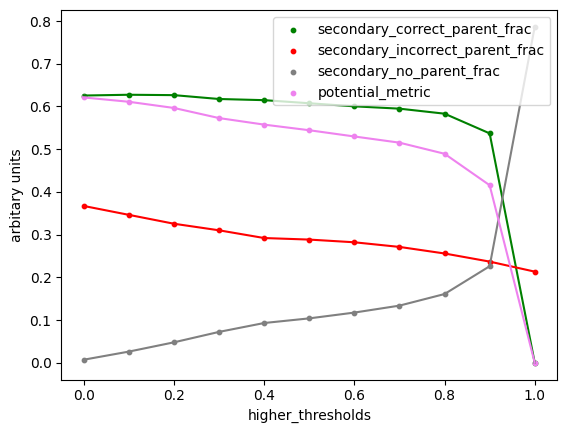

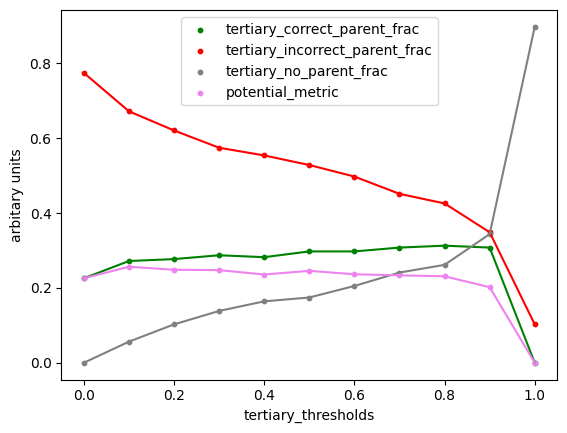

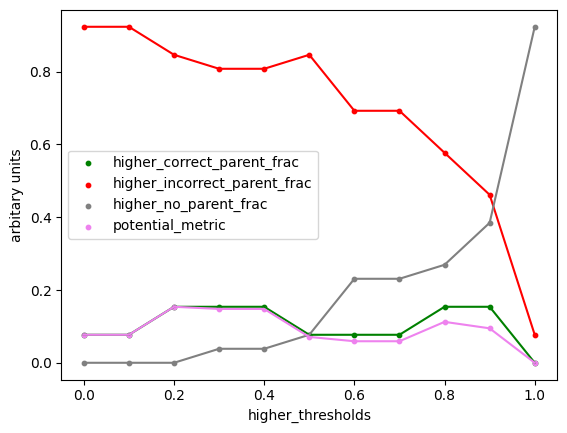

In [13]:
potential_secondary_metric = np.array(secondary_correct_parent_frac) * (1 - np.array(secondary_no_parent_frac))
potential_tertiary_metric = np.array(tertiary_correct_parent_frac) * (1 - np.array(tertiary_no_parent_frac))
potential_higher_metric = np.array(higher_correct_parent_frac) * (1 - np.array(higher_no_parent_frac))

############################
# Higher tier plot!
############################

plt.clf()
plt.scatter(higher_thresholds, secondary_correct_parent_frac, color='green', label='secondary_correct_parent_frac', s=10)
plt.plot(higher_thresholds, secondary_correct_parent_frac, color='green')

plt.scatter(higher_thresholds, secondary_incorrect_parent_frac, color='red', label='secondary_incorrect_parent_frac', s=10)
plt.plot(higher_thresholds, secondary_incorrect_parent_frac, color='red')

plt.scatter(higher_thresholds, secondary_no_parent_frac, color='gray', label='secondary_no_parent_frac', s=10)
plt.plot(higher_thresholds, secondary_no_parent_frac, color='gray')

plt.scatter(higher_thresholds, potential_secondary_metric, color='violet', label='potential_metric', s=10)
plt.plot(higher_thresholds, potential_secondary_metric, color='violet')
    
plt.xlabel('higher_thresholds')
plt.ylabel('arbitary units')
plt.legend()
plt.show()

############################

plt.clf()
plt.scatter(higher_thresholds, tertiary_correct_parent_frac, color='green', label='tertiary_correct_parent_frac', s=10)
plt.plot(higher_thresholds, tertiary_correct_parent_frac, color='green')

plt.scatter(higher_thresholds, tertiary_incorrect_parent_frac, color='red', label='tertiary_incorrect_parent_frac', s=10)
plt.plot(higher_thresholds, tertiary_incorrect_parent_frac, color='red')

plt.scatter(higher_thresholds, tertiary_no_parent_frac, color='gray', label='tertiary_no_parent_frac', s=10)
plt.plot(higher_thresholds, tertiary_no_parent_frac, color='gray')

plt.scatter(higher_thresholds, potential_tertiary_metric, color='violet', label='potential_metric', s=10)
plt.plot(higher_thresholds, potential_tertiary_metric, color='violet')

plt.xlabel('tertiary_thresholds')
plt.ylabel('arbitary units')
plt.legend()
plt.show()


############################

plt.clf()
plt.scatter(higher_thresholds, higher_correct_parent_frac, color='green', label='higher_correct_parent_frac', s=10)
plt.plot(higher_thresholds, higher_correct_parent_frac, color='green')

plt.scatter(higher_thresholds, higher_incorrect_parent_frac, color='red', label='higher_incorrect_parent_frac', s=10)
plt.plot(higher_thresholds, higher_incorrect_parent_frac, color='red')

plt.scatter(higher_thresholds, higher_no_parent_frac, color='gray', label='higher_no_parent_frac', s=10)
plt.plot(higher_thresholds, higher_no_parent_frac, color='gray')

plt.scatter(higher_thresholds, potential_higher_metric, color='violet', label='potential_metric', s=10)
plt.plot(higher_thresholds, potential_higher_metric, color='violet')

plt.xlabel('higher_thresholds')
plt.ylabel('arbitary units')
plt.legend()
plt.show()

In [14]:
#######################################
# Define optimal higher threshold
#######################################

HIGHER_THRESHOLD = 0.6

In [15]:
##################################################
# Build the higher tier with optimised threshold!
##################################################

############################
# Loop through events
############################

for iEvent in range(nEntries) :

    this_particle_tiers = [[]]
    this_particle_tiers[0] = primaries[iEvent]

    # In this case we do not want to make a copy
    this_parentPFPIndex = new_parentPFPIndex[iEvent] 
    this_gen = new_gen[iEvent] 
    
    # Get data for the event
    particle_mask = np.array(particleMask_in[iEvent])
    higher_link_mask = np.array(higherLinkMask_in[iEvent])

    nSpacepoints = np.array(nSpacepoints_in[iEvent], dtype='int')[particle_mask]
    trueTrackID = np.array(trueTrackID_in[iEvent], dtype='int')[particle_mask]
    trueVisibleGeneration = np.array(trueVisibleGeneration_in[iEvent], dtype='int')[particle_mask]
    trueVisibleParentPFPIndex = np.array(trueVisibleParentPFPIndex_in[iEvent], dtype='int')[particle_mask]

    higherTierChildIndex = np.array(childPFPIndex_in[iEvent], dtype='int')[higher_link_mask]
    higherTierParentIndex = np.array(parentPFPIndex_in[iEvent], dtype='int')[higher_link_mask]
    higherTierScores = np.array(higherTotNetworkPred_in[iEvent])[higher_link_mask]

    ############################
    # Build hierarchy
    ############################    

    # Fill each tier at a time
    while (len(this_particle_tiers[-1]) != 0) :

        tier = []

        # Have to find the highest link out of all possible links - to ensure best links are made        
        found = True

        while (found) :

            iFoundParent = -1
            iFoundChild = -1
            highestLinkScore = -1
            found = False

            # Loop over particles in last built tier
            for iParent in this_particle_tiers[-1]:
                
                if (nSpacepoints[iParent] == 0) :
                    continue

                networkLinks = np.where(higherTierParentIndex == iParent)[0]                     

                # Loop over its links
                for iLink in networkLinks :

                    iChild = higherTierChildIndex[iLink]
                    
                    #print('iEvent:', iEvent)
                    #print('iChild:', iChild)
                    
                    if (nSpacepoints[iChild] == 0) :
                        continue

                    # If the child has already been assigned a parent
                    if (this_gen[iChild] != BOGUS_INT) :
                        continue

                    this_higherTierScore = higherTierScores[iLink]
                    #print('this_higherTierScore:', this_higherTierScore)

                    if ((this_higherTierScore > highestLinkScore) and (this_higherTierScore > HIGHER_THRESHOLD)) :

                        highestLinkScore = this_higherTierScore
                        iFoundParent = iParent
                        iFoundChild = iChild
                        found = True

            # If link found, add into this tier
            if (found) :
                this_parentPFPIndex[iFoundChild] = iFoundParent
                this_gen[iFoundChild] = len(this_particle_tiers) + 2
                tier.append(iFoundChild)

        # Tier complete, add into hierarchy
        this_particle_tiers.append(tier)

In [21]:
############################
# Metrics!
#############################
n_two_d = 0
n_true_primary = 0
n_true_secondary = 0
n_true_higher = 0

# NEW!
n_correct_parent_primary_new = 0
n_tagged_as_primary_primary_new = 0
n_incorrect_parent_primary_new = 0
n_not_tagged_primary_new = 0 

n_correct_parent_secondary_new = 0
n_tagged_as_primary_secondary_new = 0
n_incorrect_parent_secondary_new = 0
n_not_tagged_secondary_new = 0 

n_correct_parent_higher_new = 0
n_tagged_as_primary_higher_new = 0
n_tagged_as_secondary_higher_new = 0
n_incorrect_parent_higher_new = 0
n_not_tagged_higher_new = 0 

for iEvent in range(nEntries) : 
    
    # Particle mask
    particle_mask = np.array(particleMask_in[iEvent])
    #particle_mask = np.logical_and(np.array(particleMask_in[iEvent]), np.array(nSpacepoints_in[iEvent]) != 0)
    # PFP info
    nSpacepoints_np = np.array(nSpacepoints_in[iEvent])[particle_mask]
    # Truth
    trueVisibleGeneration_np = np.array(trueVisibleGeneration_in[iEvent])[particle_mask]
    trueVisibleParentPFPIndex_np = np.array(trueVisibleParentPFPIndex_in[iEvent])[particle_mask]
    # New
    newParentPFPIndex_np = np.array(new_parentPFPIndex[iEvent])
    newGen_np = np.array(new_gen[iEvent])
    
    #########################
    # Get tier masks
    #########################
    two_d_mask = (nSpacepoints_np == 0)
    true_primary_mask = np.logical_and(np.logical_not(two_d_mask), trueVisibleGeneration_np == 2)
    true_secondary_mask = np.logical_and(np.logical_not(two_d_mask), trueVisibleGeneration_np == 3)
    true_higher_mask = np.logical_and(np.logical_not(two_d_mask), np.logical_not(np.logical_or(true_primary_mask, true_secondary_mask)))

    #############################################
    # Get metrics for this event - debugging
    #############################################
    # Totals
    this_two_d = np.count_nonzero(two_d_mask)
    this_true_primary = np.count_nonzero(true_primary_mask)
    this_true_secondary = np.count_nonzero(true_secondary_mask)
    this_true_higher = np.count_nonzero(true_higher_mask)
    
    # New
    this_correct_parent_primary_new = np.count_nonzero(newGen_np[true_primary_mask] == 2)
    this_tagged_as_primary_primary_new = 0
    this_not_tagged_primary_new = np.count_nonzero(newGen_np[true_primary_mask] == BOGUS_INT)
    this_incorrect_parent_primary_new = np.count_nonzero(np.logical_and(newGen_np[true_primary_mask] != 2, \
                                                                        newGen_np[true_primary_mask] != BOGUS_INT)) 
    
    this_correct_parent_secondary_new = np.count_nonzero(newParentPFPIndex_np[true_secondary_mask] == trueVisibleParentPFPIndex_np[true_secondary_mask])
    this_tagged_as_primary_secondary_new = np.count_nonzero(newGen_np[true_secondary_mask] == 2)
    this_not_tagged_secondary_new = np.count_nonzero(newGen_np[true_secondary_mask] == BOGUS_INT)
    this_incorrect_parent_secondary_new = np.count_nonzero(np.logical_not(np.logical_or(newParentPFPIndex_np[true_secondary_mask] == trueVisibleParentPFPIndex_np[true_secondary_mask], \
                                                                                        np.logical_or(newGen_np[true_secondary_mask] == 2, \
                                                                                                      newGen_np[true_secondary_mask] == BOGUS_INT))))
    
    this_correct_parent_higher_new = np.count_nonzero(newParentPFPIndex_np[true_higher_mask] == trueVisibleParentPFPIndex_np[true_higher_mask])
    this_tagged_as_primary_higher_new = np.count_nonzero(newGen_np[true_higher_mask] == 2)
    this_tagged_as_secondary_higher_new = np.count_nonzero(newGen_np[true_higher_mask] == 3)
    this_not_tagged_higher_new = np.count_nonzero(newGen_np[true_higher_mask] == BOGUS_INT)
    this_incorrect_parent_higher_new = np.count_nonzero(np.logical_not(np.logical_or(newParentPFPIndex_np[true_higher_mask] == trueVisibleParentPFPIndex_np[true_higher_mask], \
                                                                                     np.logical_or(newGen_np[true_higher_mask] == 2, \
                                                                                     np.logical_or(newGen_np[true_higher_mask] == 3, \
                                                                                                   newGen_np[true_higher_mask] == BOGUS_INT)))))

    
    #############################################
    # Add metrics to global
    #############################################
    n_two_d += this_two_d
    n_true_primary += this_true_primary
    n_true_secondary += this_true_secondary
    n_true_higher += this_true_higher
    n_correct_parent_primary_new += this_correct_parent_primary_new
    n_tagged_as_primary_primary_new += this_tagged_as_primary_primary_new
    n_incorrect_parent_primary_new += this_incorrect_parent_primary_new
    n_not_tagged_primary_new += this_not_tagged_primary_new
    n_correct_parent_secondary_new += this_correct_parent_secondary_new
    n_tagged_as_primary_secondary_new += this_tagged_as_primary_secondary_new
    n_incorrect_parent_secondary_new += this_incorrect_parent_secondary_new
    n_not_tagged_secondary_new += this_not_tagged_secondary_new
    n_correct_parent_higher_new += this_correct_parent_higher_new
    n_tagged_as_primary_higher_new += this_tagged_as_primary_higher_new
    n_tagged_as_secondary_higher_new += this_tagged_as_secondary_higher_new
    n_incorrect_parent_higher_new += this_incorrect_parent_higher_new
    n_not_tagged_higher_new += this_not_tagged_higher_new
    
    
    
#############################################
# Print metrics
#############################################   
    
n_correct_parent_primary_frac = round(float(n_correct_parent_primary_new) / float(n_true_primary), 2)
n_tagged_as_primary_primary_frac = round(float(n_tagged_as_primary_primary_new) / float(n_true_primary), 2)
n_incorrect_parent_primary_frac = round(float(n_incorrect_parent_primary_new) / float(n_true_primary), 2)
n_not_tagged_primary_frac = round(float(n_not_tagged_primary_new) / float(n_true_primary), 2)
    
    
n_correct_parent_secondary_frac = round(float(n_correct_parent_secondary_new) / float(n_true_secondary), 2)
n_tagged_as_primary_secondary_frac = round(float(n_tagged_as_primary_secondary_new) / float(n_true_secondary), 2)
n_incorrect_parent_secondary_frac = round(float(n_incorrect_parent_secondary_new) / float(n_true_secondary), 2)
n_not_tagged_secondary_frac = round(float(n_not_tagged_secondary_new) / float(n_true_secondary), 2)

n_correct_parent_higher_frac = round(float(n_correct_parent_higher_new) / float(n_true_higher), 2)
n_tagged_as_primary_higher_frac = round(float(n_tagged_as_primary_higher_new) / float(n_true_higher), 2)
n_tagged_as_secondary_higher_frac = round(float(n_tagged_as_secondary_higher_new) / float(n_true_higher), 2)
n_incorrect_parent_higher_frac = round(float(n_incorrect_parent_higher_new) / float(n_true_higher), 2)
n_not_tagged_higher_frac = round(float(n_not_tagged_higher_new) / float(n_true_higher), 2)


print('------------------------------------------------')
print('')
print('-------------------------------------------------')
print('NEW - True Gen   | Primary | Secondary | Higher |')
print('-------------------------------------------------')
print('Correct parent   |' + str(n_correct_parent_primary_frac) + str(' '* (9 - len(str(n_correct_parent_primary_frac)))) + \
                       '|' + str(n_correct_parent_secondary_frac) + str(' '* (11 - len(str(n_correct_parent_secondary_frac)))) + \
                       '|' + str(n_correct_parent_higher_frac) + str(' '* (8 - len(str(n_correct_parent_higher_frac)))) + \
                       '|')
print('False primary    |' + str(n_tagged_as_primary_primary_frac) + str(' '* (9 - len(str(n_tagged_as_primary_primary_frac)))) + \
                       '|' + str(n_tagged_as_primary_secondary_frac) + str(' '* (11 - len(str(n_tagged_as_primary_secondary_frac)))) + \
                       '|' + str(n_tagged_as_primary_higher_frac) + str(' '* (8 - len(str(n_tagged_as_primary_higher_frac)))) + \
                       '|')
print('Incorrect parent |' + str(n_incorrect_parent_primary_frac) + str(' '* (9 - len(str(n_incorrect_parent_primary_frac)))) + \
                       '|' + str(n_incorrect_parent_secondary_frac) + str(' '* (11 - len(str(n_incorrect_parent_secondary_frac)))) + \
                       '|' + str(n_incorrect_parent_higher_frac) + str(' '* (8 - len(str(n_incorrect_parent_higher_frac)))) + \
                       '|')
print('Not tagged       |' + str(n_not_tagged_primary_frac) + str(' '* (9 - len(str(n_not_tagged_primary_frac)))) + \
                       '|' + str(n_not_tagged_secondary_frac) + str(' '* (11 - len(str(n_not_tagged_secondary_frac)))) + \
                       '|' + str(n_not_tagged_higher_frac) + str(' '* (8 - len(str(n_not_tagged_higher_frac)))) + \
                       '|')
print('False secondary  |' + str(0.0) + str(' '* (9 - len(str(0.0)))) + \
                       '|' + str(0.0) + str(' '* (11 - len(str(0.0)))) + \
                       '|' + str(n_tagged_as_secondary_higher_frac) + str(' '* (8 - len(str(n_tagged_as_secondary_higher_frac)))) + \
                       '|')
print('-------------------------------------------------')
print('Total            |' + str(n_true_primary) + str(' '* (9 - len(str(n_true_primary)))) + \
                       '|' + str(n_true_secondary) + str(' '* (11 - len(str(n_true_secondary)))) + \
                       '|' + str(n_true_higher) + str(' '* (8 - len(str(n_true_higher)))) + \
                       '|')
print('-------------------------------------------------')

print('n_two_d (not included in metrics):', n_two_d)

------------------------------------------------

-------------------------------------------------
NEW - True Gen   | Primary | Secondary | Higher |
-------------------------------------------------
Correct parent   |0.94     |0.6        |0.27    |
False primary    |0.0      |0.33       |0.31    |
Incorrect parent |0.06     |0.07       |0.03    |
Not tagged       |0.0      |0.0        |0.0     |
False secondary  |0.0      |0.0        |0.58    |
-------------------------------------------------
Total            |3373     |1106       |221     |
-------------------------------------------------
n_two_d (not included in metrics): 221


In [17]:
######################################
# Say that any remaining are primaries
###################################### 

for iEvent in range(nEntries) : 

    this_parentPFPIndex= new_parentPFPIndex[iEvent] # Will not make a copy (will be by reference)
    this_gen = new_gen[iEvent] # Will not make a copy (will be by reference)
    
    for iParticle in range(len(this_gen)) :
            
        if (this_gen[iParticle] == BOGUS_INT) :
            this_parentPFPIndex[iParticle] = -1
            this_gen[iParticle] = 2


In [18]:
############################
# Metrics!
#############################
n_two_d = 0
n_true_primary = 0
n_true_secondary = 0
n_true_higher = 0

# NEW!
n_correct_parent_primary_new = 0
n_tagged_as_primary_primary_new = 0
n_incorrect_parent_primary_new = 0
n_not_tagged_primary_new = 0 

n_correct_parent_secondary_new = 0
n_tagged_as_primary_secondary_new = 0
n_incorrect_parent_secondary_new = 0
n_not_tagged_secondary_new = 0 

n_correct_parent_higher_new = 0
n_tagged_as_primary_higher_new = 0
n_incorrect_parent_higher_new = 0
n_not_tagged_higher_new = 0 

for iEvent in range(nEntries) : 
    
    # Particle mask
    particle_mask = np.array(particleMask_in[iEvent])
    #particle_mask = np.logical_and(np.array(particleMask_in[iEvent]), np.array(nSpacepoints_in[iEvent]) != 0)
    # PFP info
    nSpacepoints_np = np.array(nSpacepoints_in[iEvent])[particle_mask]
    # Truth
    trueVisibleGeneration_np = np.array(trueVisibleGeneration_in[iEvent])[particle_mask]
    trueVisibleParentPFPIndex_np = np.array(trueVisibleParentPFPIndex_in[iEvent])[particle_mask]
    # New
    newParentPFPIndex_np = np.array(new_parentPFPIndex[iEvent])
    newGen_np = np.array(new_gen[iEvent])
    
    #########################
    # Get tier masks
    #########################
    two_d_mask = (nSpacepoints_np == 0)
    true_primary_mask = np.logical_and(np.logical_not(two_d_mask), trueVisibleGeneration_np == 2)
    true_secondary_mask = np.logical_and(np.logical_not(two_d_mask), trueVisibleGeneration_np == 3)
    true_higher_mask = np.logical_and(np.logical_not(two_d_mask), np.logical_not(np.logical_or(true_primary_mask, true_secondary_mask)))

    #############################################
    # Get metrics for this event - debugging
    #############################################
    # Totals
    this_two_d = np.count_nonzero(two_d_mask)
    this_true_primary = np.count_nonzero(true_primary_mask)
    this_true_secondary = np.count_nonzero(true_secondary_mask)
    this_true_higher = np.count_nonzero(true_higher_mask)
    
    # New
    this_correct_parent_primary_new = np.count_nonzero(newGen_np[true_primary_mask] == 2)
    this_tagged_as_primary_primary_new = 0
    this_not_tagged_primary_new = np.count_nonzero(newGen_np[true_primary_mask] == BOGUS_INT)
    this_incorrect_parent_primary_new = np.count_nonzero(np.logical_and(newGen_np[true_primary_mask] != 2, \
                                                                        newGen_np[true_primary_mask] != BOGUS_INT)) 
    
    this_correct_parent_secondary_new = np.count_nonzero(newParentPFPIndex_np[true_secondary_mask] == trueVisibleParentPFPIndex_np[true_secondary_mask])
    this_tagged_as_primary_secondary_new = np.count_nonzero(newGen_np[true_secondary_mask] == 2)
    this_not_tagged_secondary_new = np.count_nonzero(newGen_np[true_secondary_mask] == BOGUS_INT)
    this_incorrect_parent_secondary_new = np.count_nonzero(np.logical_not(np.logical_or(newParentPFPIndex_np[true_secondary_mask] == trueVisibleParentPFPIndex_np[true_secondary_mask], \
                                                                                        np.logical_or(newGen_np[true_secondary_mask] == 2, \
                                                                                                      newGen_np[true_secondary_mask] == BOGUS_INT))))
    
    this_correct_parent_higher_new = np.count_nonzero(newParentPFPIndex_np[true_higher_mask] == trueVisibleParentPFPIndex_np[true_higher_mask])
    this_tagged_as_primary_higher_new = np.count_nonzero(newGen_np[true_higher_mask] == 2)
    this_not_tagged_higher_new = np.count_nonzero(newGen_np[true_higher_mask] == BOGUS_INT)
    this_incorrect_parent_higher_new = np.count_nonzero(np.logical_not(np.logical_or(newParentPFPIndex_np[true_higher_mask] == trueVisibleParentPFPIndex_np[true_higher_mask], \
                                                                                     np.logical_or(newGen_np[true_higher_mask] == 2, \
                                                                                                   newGen_np[true_higher_mask] == BOGUS_INT))))

    
    #############################################
    # Add metrics to global
    #############################################
    n_two_d += this_two_d
    n_true_primary += this_true_primary
    n_true_secondary += this_true_secondary
    n_true_higher += this_true_higher
    n_correct_parent_primary_new += this_correct_parent_primary_new
    n_tagged_as_primary_primary_new += this_tagged_as_primary_primary_new
    n_incorrect_parent_primary_new += this_incorrect_parent_primary_new
    n_not_tagged_primary_new += this_not_tagged_primary_new
    n_correct_parent_secondary_new += this_correct_parent_secondary_new
    n_tagged_as_primary_secondary_new += this_tagged_as_primary_secondary_new
    n_incorrect_parent_secondary_new += this_incorrect_parent_secondary_new
    n_not_tagged_secondary_new += this_not_tagged_secondary_new
    n_correct_parent_higher_new += this_correct_parent_higher_new
    n_tagged_as_primary_higher_new += this_tagged_as_primary_higher_new
    n_incorrect_parent_higher_new += this_incorrect_parent_higher_new
    n_not_tagged_higher_new += this_not_tagged_higher_new
    
    
    
#############################################
# Print metrics
#############################################   
    
n_correct_parent_primary_frac = round(float(n_correct_parent_primary_new) / float(n_true_primary), 2)
n_tagged_as_primary_primary_frac = round(float(n_tagged_as_primary_primary_new) / float(n_true_primary), 2)
n_incorrect_parent_primary_frac = round(float(n_incorrect_parent_primary_new) / float(n_true_primary), 2)
n_not_tagged_primary_frac = round(float(n_not_tagged_primary_new) / float(n_true_primary), 2)
    
    
n_correct_parent_secondary_frac = round(float(n_correct_parent_secondary_new) / float(n_true_secondary), 2)
n_tagged_as_primary_secondary_frac = round(float(n_tagged_as_primary_secondary_new) / float(n_true_secondary), 2)
n_incorrect_parent_secondary_frac = round(float(n_incorrect_parent_secondary_new) / float(n_true_secondary), 2)
n_not_tagged_secondary_frac = round(float(n_not_tagged_secondary_new) / float(n_true_secondary), 2)

n_correct_parent_higher_frac = round(float(n_correct_parent_higher_new) / float(n_true_higher), 2)
n_tagged_as_primary_higher_frac = round(float(n_tagged_as_primary_higher_new) / float(n_true_higher), 2)
n_incorrect_parent_higher_frac = round(float(n_incorrect_parent_higher_new) / float(n_true_higher), 2)
n_not_tagged_higher_frac = round(float(n_not_tagged_higher_new) / float(n_true_higher), 2)


print('------------------------------------------------')
print('')
print('-------------------------------------------------')
print('NEW - True Gen   | Primary | Secondary | Higher |')
print('-------------------------------------------------')
print('Correct parent   |' + str(n_correct_parent_primary_frac) + str(' '* (9 - len(str(n_correct_parent_primary_frac)))) + \
                       '|' + str(n_correct_parent_secondary_frac) + str(' '* (11 - len(str(n_correct_parent_secondary_frac)))) + \
                       '|' + str(n_correct_parent_higher_frac) + str(' '* (8 - len(str(n_correct_parent_higher_frac)))) + \
                       '|')
print('False primary    |' + str(n_tagged_as_primary_primary_frac) + str(' '* (9 - len(str(n_tagged_as_primary_primary_frac)))) + \
                       '|' + str(n_tagged_as_primary_secondary_frac) + str(' '* (11 - len(str(n_tagged_as_primary_secondary_frac)))) + \
                       '|' + str(n_tagged_as_primary_higher_frac) + str(' '* (8 - len(str(n_tagged_as_primary_higher_frac)))) + \
                       '|')
print('Incorrect parent |' + str(n_incorrect_parent_primary_frac) + str(' '* (9 - len(str(n_incorrect_parent_primary_frac)))) + \
                       '|' + str(n_incorrect_parent_secondary_frac) + str(' '* (11 - len(str(n_incorrect_parent_secondary_frac)))) + \
                       '|' + str(n_incorrect_parent_higher_frac) + str(' '* (8 - len(str(n_incorrect_parent_higher_frac)))) + \
                       '|')
print('Not tagged       |' + str(n_not_tagged_primary_frac) + str(' '* (9 - len(str(n_not_tagged_primary_frac)))) + \
                       '|' + str(n_not_tagged_secondary_frac) + str(' '* (11 - len(str(n_not_tagged_secondary_frac)))) + \
                       '|' + str(n_not_tagged_higher_frac) + str(' '* (8 - len(str(n_not_tagged_higher_frac)))) + \
                       '|')
print('-------------------------------------------------')
print('Total            |' + str(n_true_primary) + str(' '* (9 - len(str(n_true_primary)))) + \
                       '|' + str(n_true_secondary) + str(' '* (11 - len(str(n_true_secondary)))) + \
                       '|' + str(n_true_higher) + str(' '* (8 - len(str(n_true_higher)))) + \
                       '|')
print('-------------------------------------------------')

print('n_two_d (not included in metrics):', n_two_d)

------------------------------------------------

-------------------------------------------------
NEW - True Gen   | Primary | Secondary | Higher |
-------------------------------------------------
Correct parent   |0.94     |0.6        |0.27    |
False primary    |0.0      |0.33       |0.31    |
Incorrect parent |0.06     |0.07       |0.42    |
Not tagged       |0.0      |0.0        |0.0     |
-------------------------------------------------
Total            |3373     |1106       |221     |
-------------------------------------------------
n_two_d (not included in metrics): 221


In [19]:
############################
# Pandora metrics!
#############################
n_two_d = 0
n_true_primary = 0
n_true_secondary = 0
n_true_higher = 0

n_correct_parent_primary_pandora = 0
n_tagged_as_primary_primary_pandora = 0
n_incorrect_parent_primary_pandora = 0
n_not_tagged_primary_pandora = 0 

n_correct_parent_secondary_pandora = 0
n_tagged_as_primary_secondary_pandora = 0
n_incorrect_parent_secondary_pandora = 0
n_not_tagged_secondary_pandora = 0 

n_correct_parent_higher_pandora = 0
n_tagged_as_primary_higher_pandora = 0
n_incorrect_parent_higher_pandora = 0
n_not_tagged_higher_pandora = 0 

for iEvent in range(nEntries) : 
    
    # Particle mask
    particle_mask = np.array(particleMask_in[iEvent])
    # PFP info
    nSpacepoints_np = np.array(nSpacepoints_in[iEvent])[particle_mask]
    pandoraParentSelf_np = np.array(pandoraParentSelf_in[iEvent])[particle_mask]
    pandoraGeneration_np = np.array(pandoraGeneration_in[iEvent])[particle_mask]
    # Truth
    trueVisibleGeneration_np = np.array(trueVisibleGeneration_in[iEvent])[particle_mask]
    trueVisibleParentPFPIndex_np = np.array(trueVisibleParentPFPIndex_in[iEvent])[particle_mask]
    trueVisibleParentSelf_np = np.array(trueVisibleParentSelf_in[iEvent])[particle_mask]
    
    #########################
    # Get tier masks
    #########################
    two_d_mask = (nSpacepoints_np == 0)
    true_primary_mask = np.logical_and(np.logical_not(two_d_mask), trueVisibleGeneration_np == 2)
    true_secondary_mask = np.logical_and(np.logical_not(two_d_mask), trueVisibleGeneration_np == 3)
    true_higher_mask = np.logical_and(np.logical_not(two_d_mask), np.logical_not(np.logical_or(true_primary_mask, true_secondary_mask)))

    #############################################
    # Get metrics for this event - debugging
    #############################################
    # Totals
    this_two_d = np.count_nonzero(two_d_mask)
    this_true_primary = np.count_nonzero(true_primary_mask)
    this_true_secondary = np.count_nonzero(true_secondary_mask)
    this_true_higher = np.count_nonzero(true_higher_mask)
    
    # Pandora
    this_correct_parent_primary_pandora = np.count_nonzero(pandoraGeneration_np[true_primary_mask] == 2)
    this_tagged_as_primary_primary_pandora = 0
    this_not_tagged_primary_pandora = np.count_nonzero(pandoraGeneration_np[true_primary_mask] == BOGUS_INT)
    this_incorrect_parent_primary_pandora = np.count_nonzero(np.logical_and(pandoraGeneration_np[true_primary_mask] != 2, \
                                                                        pandoraGeneration_np[true_primary_mask] != BOGUS_INT)) 
    
    this_correct_parent_secondary_pandora = np.count_nonzero(pandoraParentSelf_np[true_secondary_mask] == trueVisibleParentSelf_np[true_secondary_mask])
    this_tagged_as_primary_secondary_pandora = np.count_nonzero(pandoraGeneration_np[true_secondary_mask] == 2)
    this_not_tagged_secondary_pandora = np.count_nonzero(pandoraGeneration_np[true_secondary_mask] == BOGUS_INT)
    this_incorrect_parent_secondary_pandora = np.count_nonzero(np.logical_not(np.logical_or(pandoraParentSelf_np[true_secondary_mask] == trueVisibleParentSelf_np[true_secondary_mask], \
                                                                                        np.logical_or(pandoraGeneration_np[true_secondary_mask] == 2, \
                                                                                        pandoraGeneration_np[true_secondary_mask] == BOGUS_INT))))
    
    this_correct_parent_higher_pandora = np.count_nonzero(pandoraParentSelf_np[true_higher_mask] == trueVisibleParentSelf_np[true_higher_mask])
    this_tagged_as_primary_higher_pandora = np.count_nonzero(pandoraGeneration_np[true_higher_mask] == 2)
    this_not_tagged_higher_pandora = np.count_nonzero(pandoraGeneration_np[true_higher_mask] == BOGUS_INT)
    this_incorrect_parent_higher_pandora = np.count_nonzero(np.logical_not(np.logical_or(pandoraParentSelf_np[true_higher_mask] == trueVisibleParentSelf_np[true_higher_mask], \
                                                                                     np.logical_or(pandoraGeneration_np[true_higher_mask] == 2, \
                                                                                                   pandoraGeneration_np[true_higher_mask] == BOGUS_INT))))

    
    #############################################
    # Add metrics to global
    #############################################
    n_two_d += this_two_d
    n_true_primary += this_true_primary
    n_true_secondary += this_true_secondary
    n_true_higher += this_true_higher
    n_correct_parent_primary_pandora += this_correct_parent_primary_pandora
    n_tagged_as_primary_primary_pandora += this_tagged_as_primary_primary_pandora
    n_incorrect_parent_primary_pandora += this_incorrect_parent_primary_pandora
    n_not_tagged_primary_pandora += this_not_tagged_primary_pandora
    n_correct_parent_secondary_pandora += this_correct_parent_secondary_pandora
    n_tagged_as_primary_secondary_pandora += this_tagged_as_primary_secondary_pandora
    n_incorrect_parent_secondary_pandora += this_incorrect_parent_secondary_pandora
    n_not_tagged_secondary_pandora += this_not_tagged_secondary_pandora
    n_correct_parent_higher_pandora += this_correct_parent_higher_pandora
    n_tagged_as_primary_higher_pandora += this_tagged_as_primary_higher_pandora
    n_incorrect_parent_higher_pandora += this_incorrect_parent_higher_pandora
    n_not_tagged_higher_pandora += this_not_tagged_higher_pandora
    
    
    
#############################################
# Print metrics
#############################################   
    
n_correct_parent_primary_frac = round(float(n_correct_parent_primary_pandora) / float(n_true_primary), 2)
n_tagged_as_primary_primary_frac = round(float(n_tagged_as_primary_primary_pandora) / float(n_true_primary), 2)
n_incorrect_parent_primary_frac = round(float(n_incorrect_parent_primary_pandora) / float(n_true_primary), 2)
n_not_tagged_primary_frac = round(float(n_not_tagged_primary_pandora) / float(n_true_primary), 2)
    
    
n_correct_parent_secondary_frac = round(float(n_correct_parent_secondary_pandora) / float(n_true_secondary), 2)
n_tagged_as_primary_secondary_frac = round(float(n_tagged_as_primary_secondary_pandora) / float(n_true_secondary), 2)
n_incorrect_parent_secondary_frac = round(float(n_incorrect_parent_secondary_pandora) / float(n_true_secondary), 2)
n_not_tagged_secondary_frac = round(float(n_not_tagged_secondary_pandora) / float(n_true_secondary), 2)

n_correct_parent_higher_frac = round(float(n_correct_parent_higher_pandora) / float(n_true_higher), 2)
n_tagged_as_primary_higher_frac = round(float(n_tagged_as_primary_higher_pandora) / float(n_true_higher), 2)
n_incorrect_parent_higher_frac = round(float(n_incorrect_parent_higher_pandora) / float(n_true_higher), 2)
n_not_tagged_higher_frac = round(float(n_not_tagged_higher_pandora) / float(n_true_higher), 2)


print('------------------------------------------------')
print('')
print('-------------------------------------------------')
print('PANDORA - True Gen   | Primary | Secondary | Higher |')
print('-------------------------------------------------')
print('Correct parent   |' + str(n_correct_parent_primary_frac) + str(' '* (9 - len(str(n_correct_parent_primary_frac)))) + \
                       '|' + str(n_correct_parent_secondary_frac) + str(' '* (11 - len(str(n_correct_parent_secondary_frac)))) + \
                       '|' + str(n_correct_parent_higher_frac) + str(' '* (8 - len(str(n_correct_parent_higher_frac)))) + \
                       '|')
print('False primary    |' + str(n_tagged_as_primary_primary_frac) + str(' '* (9 - len(str(n_tagged_as_primary_primary_frac)))) + \
                       '|' + str(n_tagged_as_primary_secondary_frac) + str(' '* (11 - len(str(n_tagged_as_primary_secondary_frac)))) + \
                       '|' + str(n_tagged_as_primary_higher_frac) + str(' '* (8 - len(str(n_tagged_as_primary_higher_frac)))) + \
                       '|')
print('Incorrect parent |' + str(n_incorrect_parent_primary_frac) + str(' '* (9 - len(str(n_incorrect_parent_primary_frac)))) + \
                       '|' + str(n_incorrect_parent_secondary_frac) + str(' '* (11 - len(str(n_incorrect_parent_secondary_frac)))) + \
                       '|' + str(n_incorrect_parent_higher_frac) + str(' '* (8 - len(str(n_incorrect_parent_higher_frac)))) + \
                       '|')
print('Not tagged       |' + str(n_not_tagged_primary_frac) + str(' '* (9 - len(str(n_not_tagged_primary_frac)))) + \
                       '|' + str(n_not_tagged_secondary_frac) + str(' '* (11 - len(str(n_not_tagged_secondary_frac)))) + \
                       '|' + str(n_not_tagged_higher_frac) + str(' '* (8 - len(str(n_not_tagged_higher_frac)))) + \
                       '|')
print('-------------------------------------------------')
print('Total            |' + str(n_true_primary) + str(' '* (9 - len(str(n_true_primary)))) + \
                       '|' + str(n_true_secondary) + str(' '* (11 - len(str(n_true_secondary)))) + \
                       '|' + str(n_true_higher) + str(' '* (8 - len(str(n_true_higher)))) + \
                       '|')
print('-------------------------------------------------')

print('n_two_d (not included in metrics):', n_two_d)

------------------------------------------------

-------------------------------------------------
PANDORA - True Gen   | Primary | Secondary | Higher |
-------------------------------------------------
Correct parent   |0.99     |0.35       |0.29    |
False primary    |0.0      |0.65       |0.67    |
Incorrect parent |0.01     |0.01       |0.05    |
Not tagged       |0.0      |0.0        |0.0     |
-------------------------------------------------
Total            |3373     |1106       |221     |
-------------------------------------------------
n_two_d (not included in metrics): 221
